# GRADUATE ADMISSIONS

### Content

The dataset contains several parameters which are considered important during the application for Masters Programs.

The parameters included are :
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )


##### Here we'll be predicting the likelihood of getting admission and what factors matters most

# Let's start by importing the essentials

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Importing the data

In [2]:
df=pd.read_csv('Admission_Predict.csv')
df.shape

(400, 9)

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


The dataset has 400 rows and 9 columns with no null values

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


# Distributions

## Chance of admission

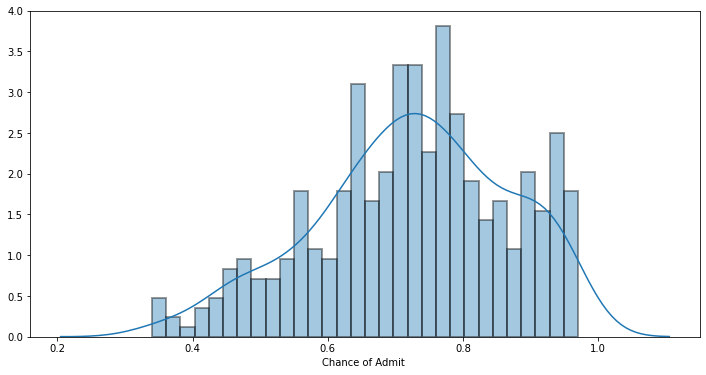

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(df['Chance of Admit '], bins=30, hist_kws=dict(edgecolor="black", linewidth=2))
plt.show()

## GRE Score

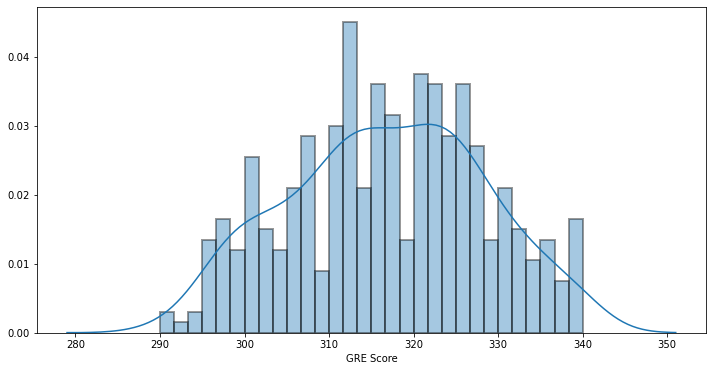

In [7]:
plt.figure(figsize=(12,6))
sns.distplot(df['GRE Score'], bins=30, hist_kws=dict(edgecolor="black", linewidth=2))
plt.show()

## TOEFL Score

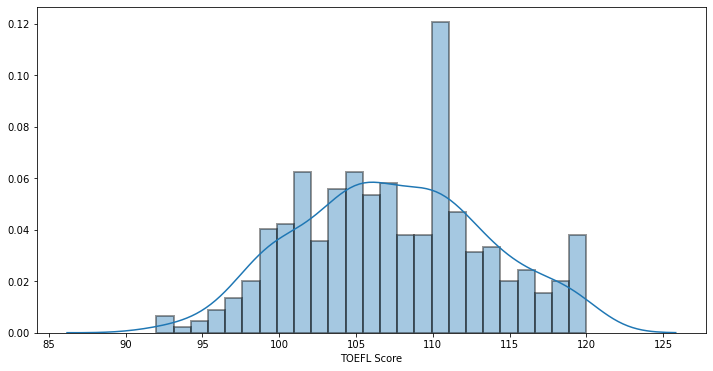

In [8]:
plt.figure(figsize=(12,6))
sns.distplot(df['TOEFL Score'], bins=25, hist_kws=dict(edgecolor="black", linewidth=2))
plt.show()

# Looking for relationships

Here we are dropping the serial number column as it isn't important 

In [9]:
data=df.drop('Serial No.', axis=1)

## Heatmap

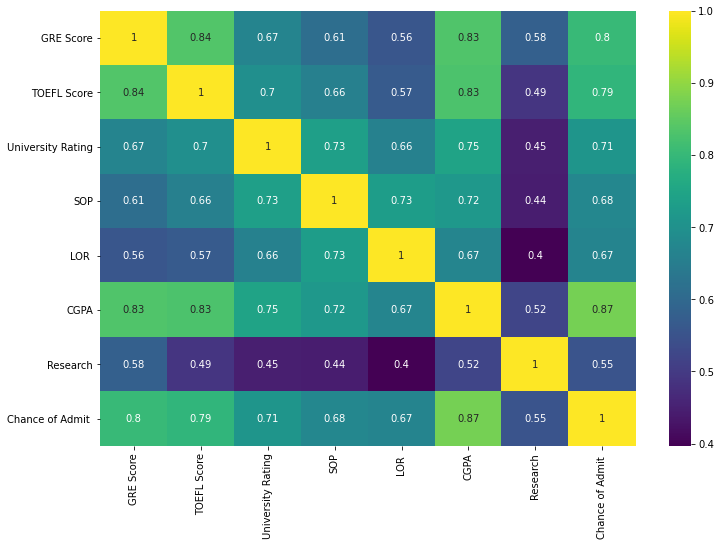

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

The following features shares a high correlation : 
1. GRE Score vs TOEFL Score
2. GRE Score vs CGPA
3. GRE Score vs Chance of Admit
4. CGPA vs Chance of Admit
5. TOEFL Score vs CGPA

## Pairplot

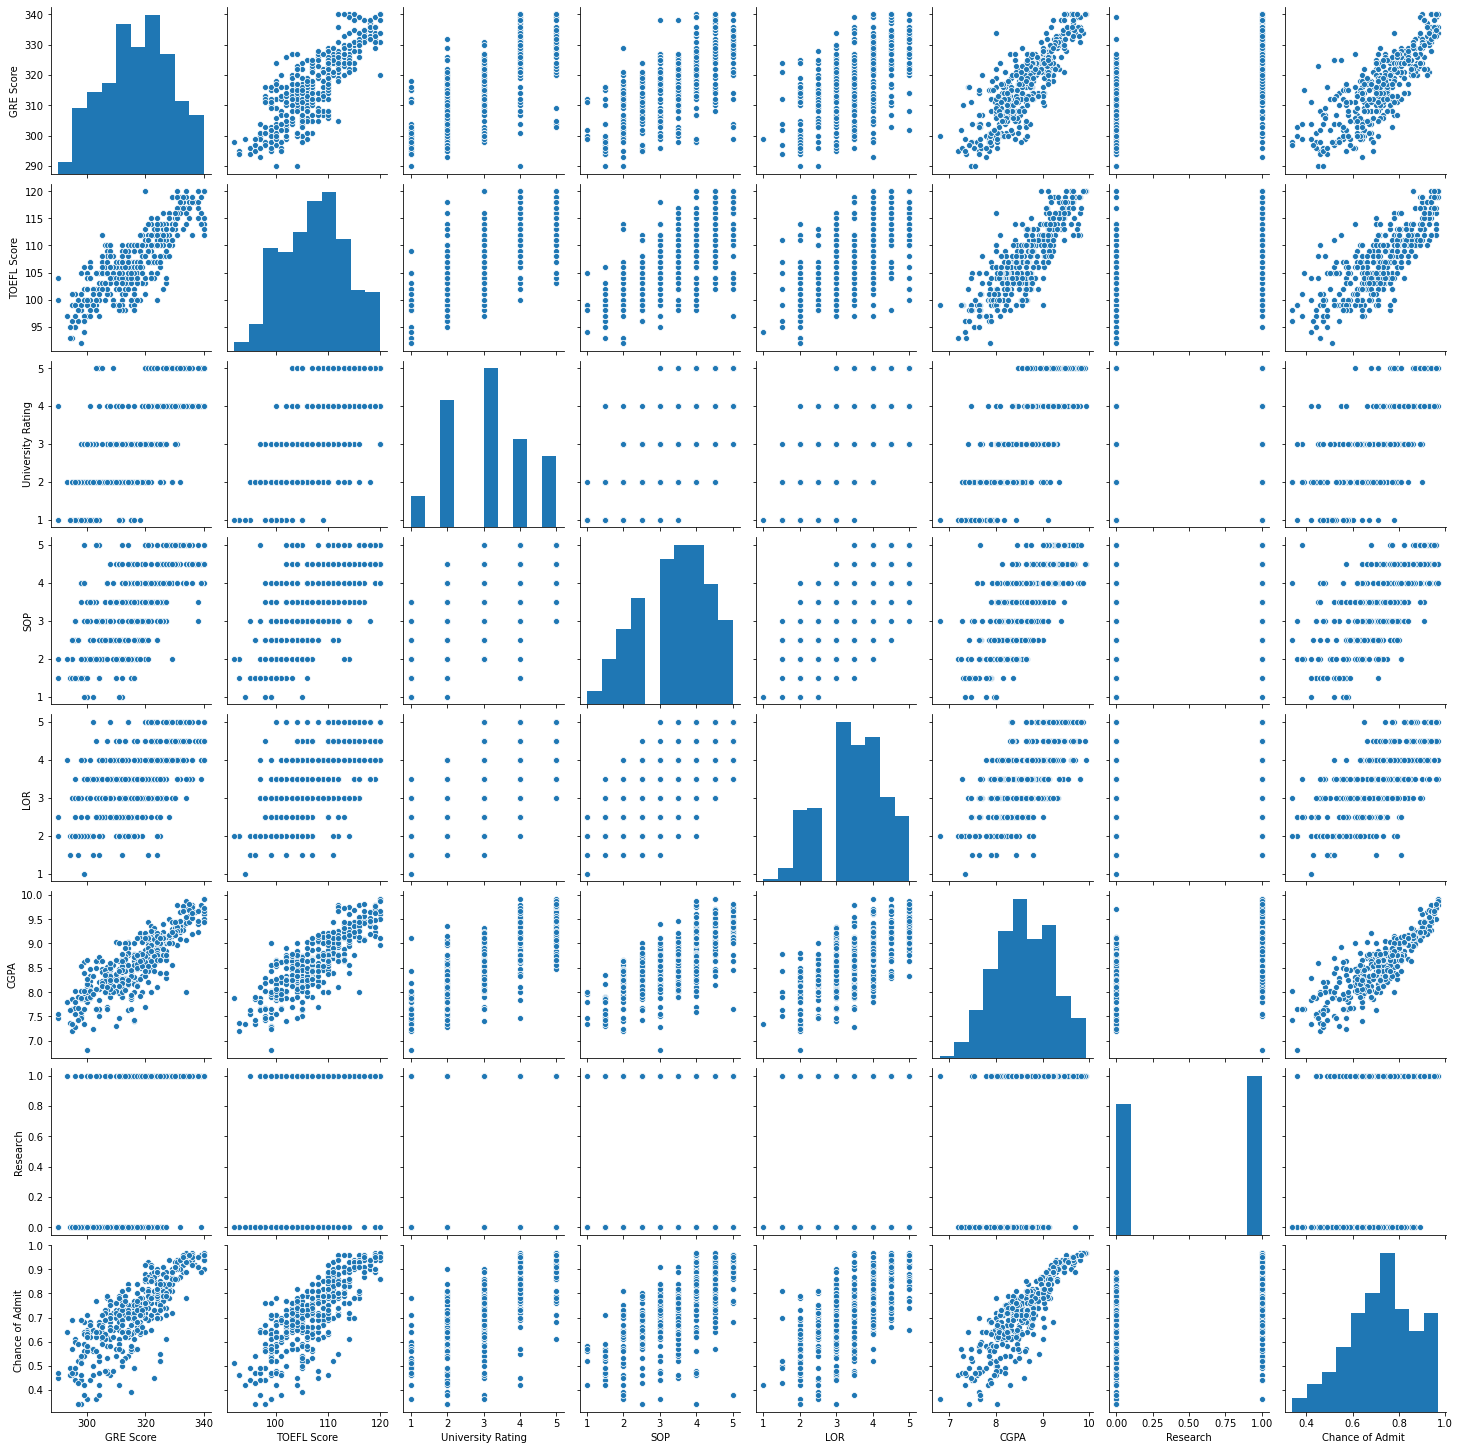

In [11]:
sns.pairplot(data)
plt.show()

CGPA vs Chance of Admit and GRE Score vs Chance of Admit shows linear correlation

## Correlation with the dependent variable

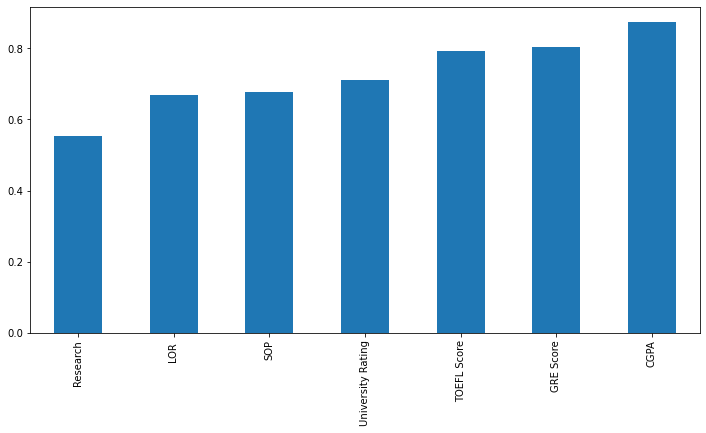

In [12]:
plt.figure(figsize=(12,6))
data.corr()['Chance of Admit '][:-1].sort_values().plot.bar()
plt.show()

Here CGPA is the most important factor for admission followed GRE Score, TOEFL Score

## Linear Relationships

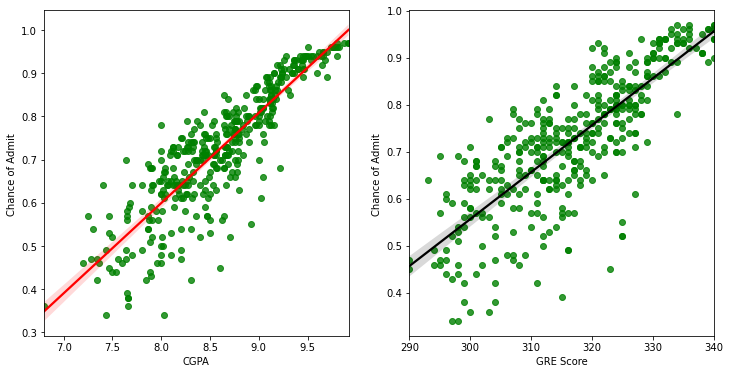

In [13]:
fig, ax=plt.subplots(1,2, figsize=(12,6))
_=sns.regplot('CGPA', 'Chance of Admit ', data=df, ax=ax[0], scatter_kws={"color": "green"},
              line_kws={"color": "red"})
_=sns.regplot('GRE Score', 'Chance of Admit ', data=df, ax=ax[1], scatter_kws={"color": "green"},
              line_kws={"color": "black"})
plt.show()

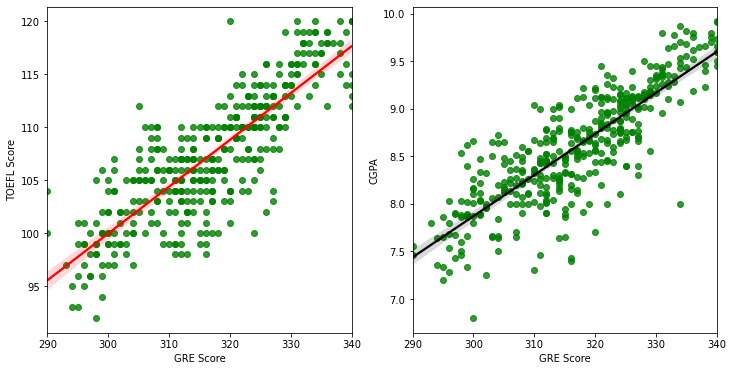

In [14]:
fig, ax=plt.subplots(1,2, figsize=(12,6))
_=sns.regplot('GRE Score', 'TOEFL Score', data=df, ax=ax[0], scatter_kws={"color": "green"},
              line_kws={"color": "red"})
_=sns.regplot('GRE Score', 'CGPA', data=df, ax=ax[1], scatter_kws={"color": "green"},
              line_kws={"color": "black"})
plt.show()

# Finding out the averages

In [15]:
print('Average GRE Score : ', df['GRE Score'].mean())
print('Average TOEFL Score : ', df['TOEFL Score'].mean())
print('Average CGPA : {}' .format(df['CGPA'].mean()))
print('Average SOP : {}' .format(df['SOP'].mean()))
print('Average LOR : {}' .format(df['LOR '].mean()))
print('Average Chance of Admission : ', df['Chance of Admit '].mean())

Average GRE Score :  316.8075
Average TOEFL Score :  107.41
Average CGPA : 8.598924999999998
Average SOP : 3.4
Average LOR : 3.4525
Average Chance of Admission :  0.7243499999999996


# Exploratory Data Analysis

## GRE Score vs Chance of Admit

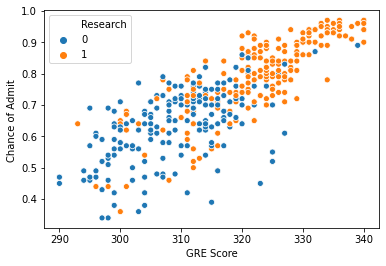

In [16]:
sns.scatterplot('GRE Score', 'Chance of Admit ', hue='Research', data=df)
plt.show()

People who have higher GRE Score also have Research experience and have higher chances of admission.

## TOEFL Score vs Chance of Admit

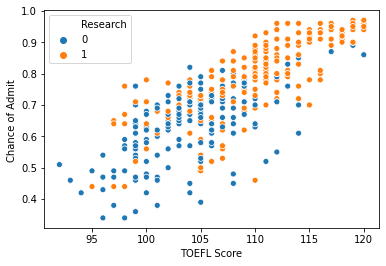

In [17]:
sns.scatterplot('TOEFL Score', 'Chance of Admit ', hue='Research', data=df)
plt.show()

People who have higher GRE Score also have Research experience and have higher chances of admission.

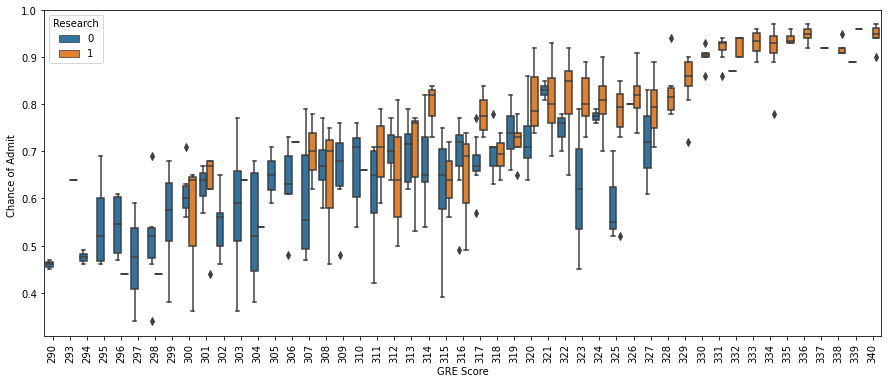

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot('GRE Score', 'Chance of Admit ', hue='Research', data=df)
plt.xticks(rotation=90)
plt.show()

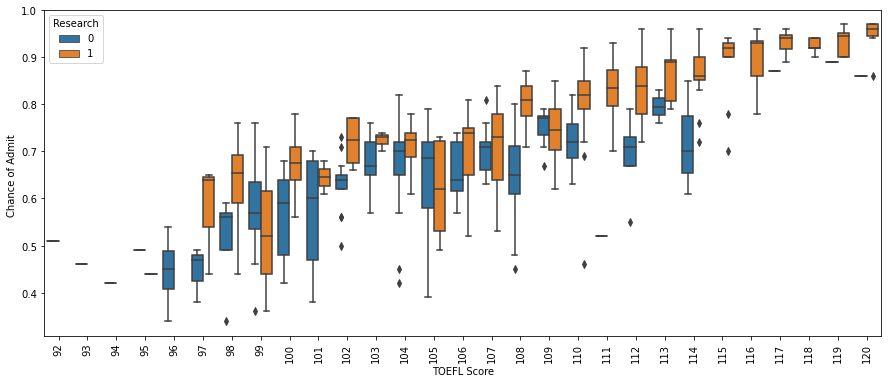

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot('TOEFL Score', 'Chance of Admit ', hue='Research', data=df)
plt.xticks(rotation=90)
plt.show()

## Counting University Ratings

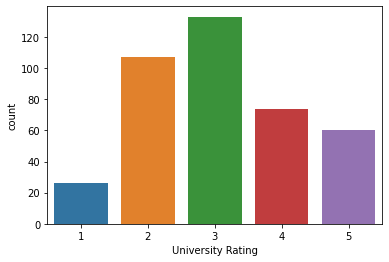

In [20]:
sns.countplot('University Rating', data=df)
plt.show()

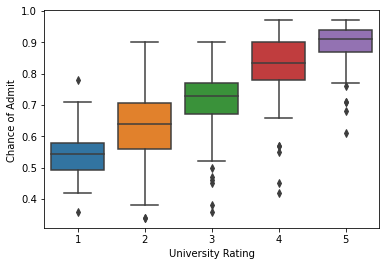

In [21]:
sns.boxplot('University Rating', 'Chance of Admit ', data=df)
plt.show()

## Counting the Letter of Recommendations

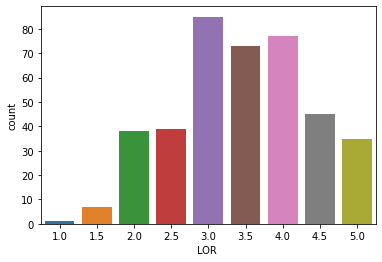

In [22]:
sns.countplot('LOR ', data=df)
plt.show()

## Distribution of Letter of Recommendations

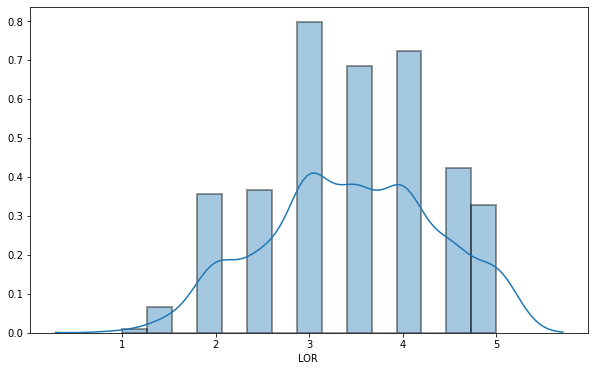

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df['LOR '], hist_kws=dict(edgecolor="black", linewidth=2))
plt.show()

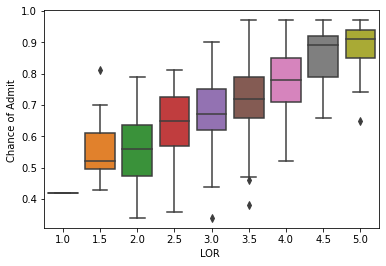

In [24]:
sns.boxplot('LOR ', 'Chance of Admit ', data=df)
plt.show()

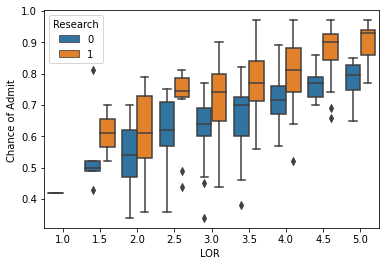

In [25]:
sns.boxplot('LOR ', 'Chance of Admit ', hue='Research', data=df)
plt.show()

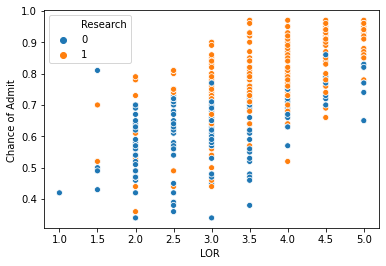

In [26]:
sns.scatterplot('LOR ', 'Chance of Admit ', hue='Research', data=df)
plt.show()

We can clearly see that people who have LOR's and also have done Research have higher Chances of Admission

## Statement of Purpose 

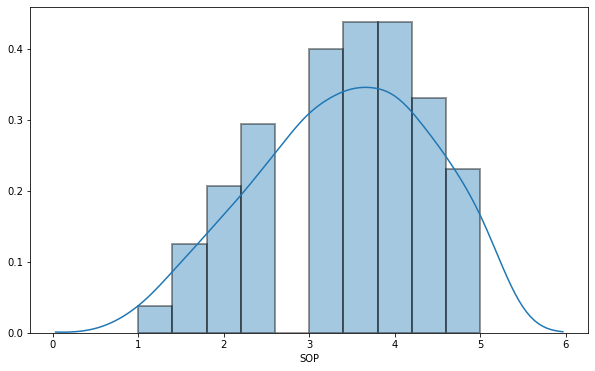

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(df['SOP'], hist_kws=dict(edgecolor="black", linewidth=2))
plt.show()

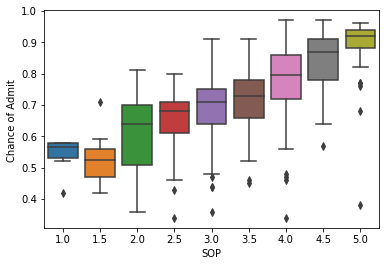

In [28]:
sns.boxplot('SOP', 'Chance of Admit ', data=df)
plt.show()

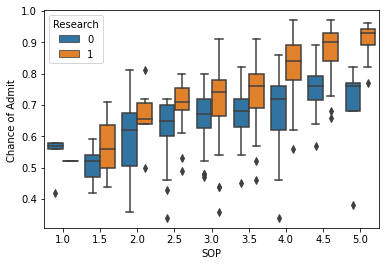

In [29]:
sns.boxplot('SOP', 'Chance of Admit ', hue='Research', data=df)
plt.show()

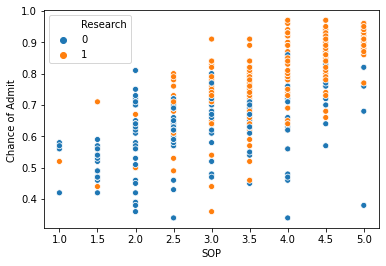

In [30]:
sns.scatterplot('SOP', 'Chance of Admit ', hue='Research', data=df)
plt.show()

People who have LOR's and also have done Research have higher Chances of Admission

## CGPA Distribution

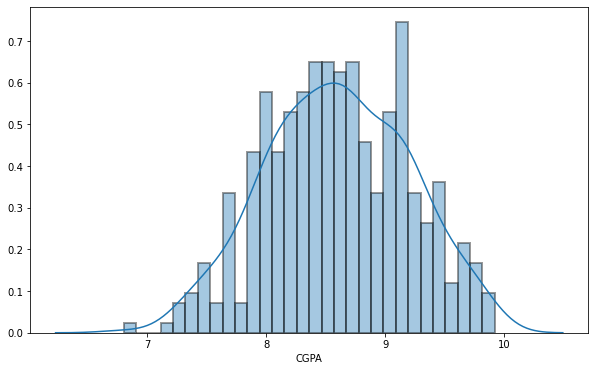

In [31]:
plt.figure(figsize=(10,6))
sns.distplot(df['CGPA'], bins=30, hist_kws=dict(edgecolor="black", linewidth=2))
plt.show()

Maximum CGPA's are between 8 and 9

## Research

### Research Count

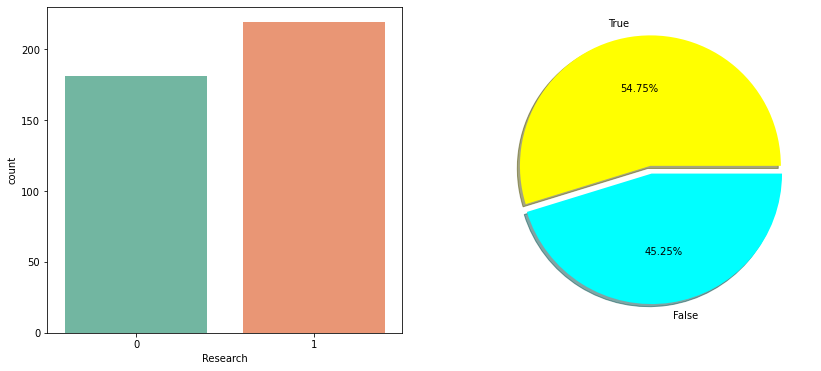

In [32]:
size = df['Research'].value_counts()
color = ['yellow', 'aqua']
explode = [0.03, 0.03]
labels = ['True', 'False']
fig,ax = plt.subplots(1, 2, figsize=(14,6))
_=sns.countplot('Research', data=df, ax=ax[0], palette='Set2')
_=plt.pie(size, colors=color, autopct='%.2f%%', explode=explode, shadow=True, labels=labels)
plt.show()

## Research distribution w.r.t Chances of Admission

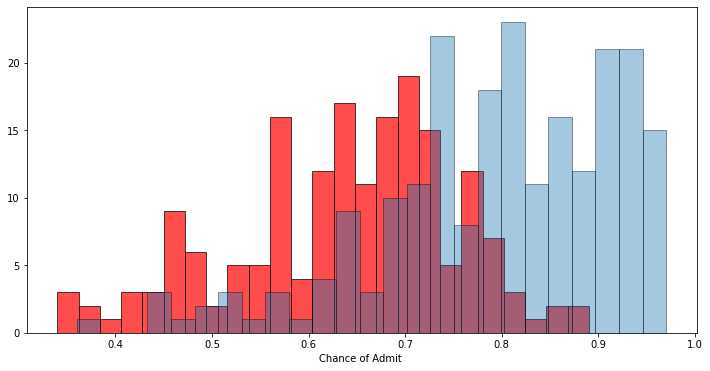

In [33]:
Research_0 = df[df['Research'] == 0]['Chance of Admit ']
Research_1 = df[df['Research'] == 1]['Chance of Admit ']
plt.figure(figsize=(12,6))
_=sns.distplot(Research_0, hist_kws={'alpha':0.7, 'edgecolor' : 'black'}, bins=25, kde=False, color='red')
_=sns.distplot(Research_1, bins=25, kde=False, hist_kws={'edgecolor' : 'black'})
plt.show()

People who have Research Experience have max Chances of Admission distributed between 0.7 and 0.9 whereas People who doesn't have Research Experience have max Chances of Admission distributed between 0.6 to 0.75

# Train Test Split

In [34]:
df=df.drop('Serial No.', axis=1)

In [35]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('X_train : {} '.format(X_train.shape))
print('X_test : {} '.format(X_test.shape))
print('y_train : {} '.format(y_train.shape))
print('y_test : {} '.format(y_test.shape))

X_train : (300, 7) 
X_test : (100, 7) 
y_train : (300,) 
y_test : (100,) 


# Scaling the data

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Performing regression on the given data

In [38]:
models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['ExtraTreeRegressor : ', ExtraTreeRegressor()],
          ['HuberRegressor : ', HuberRegressor()],
          ['XGBRegressor : ', XGBRegressor()],
          ['BayesianRidge : ', BayesianRidge()]]

In [39]:
for name,model in models:
    model=model
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, prediction))))

LinearRegression :  0.06588497166041553
ElasticNet : 0.1538024382121428
Lasso :  0.1538024382121428
Ridge :  0.06593037460163248
KNeighborsRegressor :  0.07658145989728844
DecisionTreeRegressor :  0.09691233151668574
RandomForestRegressor :  0.06817597230696457
SVR :  0.07563415840129889
AdaBoostRegressor :  0.07475938907710766
GradientBoostingRegressor :  0.0683587164889864
ExtraTreeRegressor :  0.10462313319720454
HuberRegressor :  0.067950954560755
XGBRegressor :  0.07475310351273155
BayesianRidge :  0.06612430869272332


Here LinearRegression gives us the lowest root mean squared error

## Stacking Important Features

In [40]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

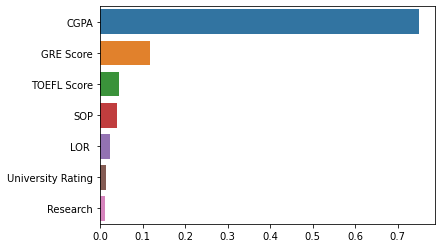

In [41]:
feature = regressor.feature_importances_
feature_importance = pd.Series(feature, index = X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance[0:], y=feature_importance.index[0:])

As we have previously seen, CGPA heavily determines your Chances of Admission followed by GRE Score and TOEFL Score

# LIKE MY WORK ??

### Do UPVOTE and leave a comment of any suggestions